[0, 0.1, -1.1, 1.1]

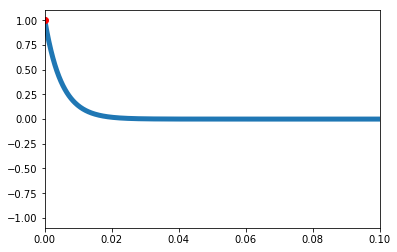

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#для модельного уравнения
#explicit Euler method
def ex_euler(u, l, h, N):
    for i in range(0, N-1):
        u[i+1] = (1+l*h)*u[i]

#implicit  Euler method      
def im_euler(u, l, h, N):
    for i in range(0, N-1):
        u[i+1] = u[i]/(1-l*h)
        


T = 1
h = 2e-2
N = int(T/h + 1)
x_teor = np.linspace(0,T,(N-1)*100+1) 
x = np.linspace(0,T,N)
l = -200

u = np.zeros(N)
u[0] = 1
ex_euler(u, l, h, N)
# im_euler(u, l, h, N)

plt.plot(x_teor, np.exp(l*x_teor),  x, u, 'ro', linewidth=5.0)
plt.axis([0, 0.1, -1.1, 1.1])

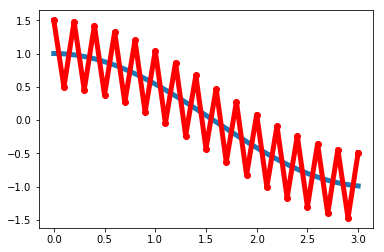

In [7]:
#L-stability
"""
рассматриваем задачу u' = l*(u-cos(t)) - sin(t)
для начального условия u(0) = 1 решение u(t) = cos(t)
для ну u(t_0) = g решение u(t) = exp(l*(t-t_0))*(g-cos(t_0)) + cos(t)
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#implicit  Euler method      
def im_euler(u, l, h, N):
    for i in range(0, N-1):
        u[i+1] = u[i]/(1-l*h) - (l*h*np.cos((i+1)*h)+h*np.sin((i+1)*h))/(1-l*h)

#trapezoidal method (u^{n+1} - u^n)/h = 0.5*(f(u^n)+f(u^{n+1}))
def trapezoidal(u, l, h, N):
    for i in range(0, N-1):
        free = l*(np.cos((i+1)*h)+np.cos(i*h))+(np.sin((i+1)*h)+np.sin(i*h))
        u[i+1] = (u[i]*(1+l*h/2)-h/2*free)/(1-l*h/2)

T = 3
h = 1e-1
N = int(T/h + 1)
x_teor = np.linspace(0,T,(N-1)*100+1) 
x = np.linspace(0,T,N)
l = -1e6

u = np.zeros(N)
#initial condition
#u[0] = 1
u[0] = 1.5 #на этих данных экспоненциальная часть решения для метода трапеции будет затухать медленно

#method
# im_euler(u, l, h, N)
trapezoidal(u, l, h, N)

plt.plot(x_teor, np.cos(x_teor),  x, u, '-ro', linewidth=5.0)
# plt.axis([0, 0.2, -1.1, 1.1])

Неявный метод устойчивый при любом h
Явный метод устойчивый при любом h<=0.02 и неустойчив при h>0.02


Text(0.5,1,'Явный метод - шаг = 3')

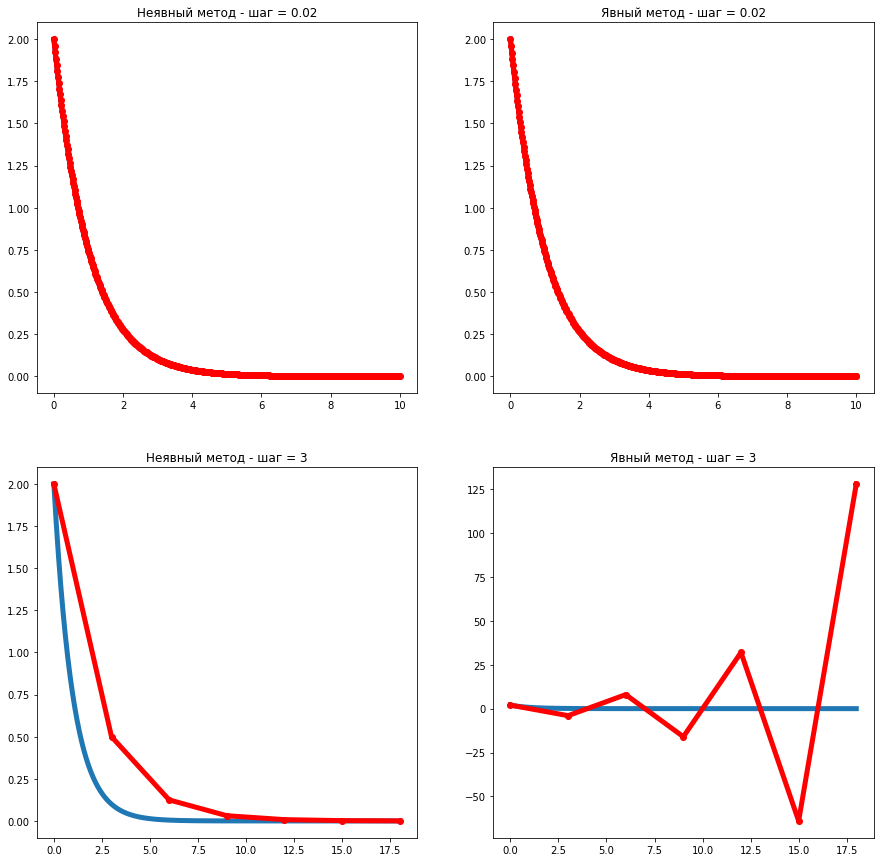

In [103]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Задача X.8.11

# Уравение y''+101*y'+100y=0 
# или
# Система
# { y'=z
# { z'=-100*y-101*z
# с начальными условиями y(0) = 2, z(0) = -2

# решением является y = 2*e^(-x)
# решим также методами Эйлера


#explicit Euler method
def ex_euler(u, r, h, N):
    for i in range(0, N-1):
        u[i+1] = (u[i] + r[i]*h)
        r[i+1] = (u[i]*(-100*h) + r[i]*(1-101*h))

#implicit Euler method      
def im_euler(u, r, h, N):
    const = 1+101*h+100*h*h
    for i in range(0, N-1):
        u[i+1] = (u[i]*(1+101*h) + r[i]*h)/const
        r[i+1] = (u[i]*(-100*h) + r[i])/const

fig_size = plt.rcParams["figure.figsize"]
fig_size[1] = 15 #height
fig_size[0] = 15 #weight
plt.rcParams["figure.figsize"] = fig_size
fig = plt.figure()

T = 10
h = 2e-2
N = int(T/h + 1)
x_teor = np.linspace(0,T,(N-1)*100+1) 
x = np.linspace(0,T,N)

u = np.zeros(N)
u[0] = 2
r = np.zeros(N)
r[0] = -2

print('Неявный метод устойчивый при любом h')
print('Явный метод устойчивый при любом h<=0.02 и неустойчив при h>0.02')
ax = plt.subplot(2,2,1)
im_euler(u, r, h, N)
plt.plot(x_teor, 2*np.exp(-x_teor),  x, u, '-ro', linewidth=5.0)
ax.set_title(f'Неявный метод - шаг = {h}')

ax = plt.subplot(2,2,2)
ex_euler(u, r, h, N)
plt.plot(x_teor, 2*np.exp(-x_teor),  x, u, '-ro', linewidth=5.0)
ax.set_title(f'Явный метод - шаг = {h}')

T = 18
h = 3
N = int(T/h + 1)
x_teor = np.linspace(0,T,(N-1)*100+1) 
x = np.linspace(0,T,N)

u = np.zeros(N)
u[0] = 2
r = np.zeros(N)
r[0] = -2

ax = plt.subplot(2,2,3)
im_euler(u, r, h, N)
plt.plot(x_teor, 2*np.exp(-x_teor),  x, u, '-ro', linewidth=5.0)
ax.set_title(f'Неявный метод - шаг = {h}')

ax = plt.subplot(2,2,4)
ex_euler(u, r, h, N)
plt.plot(x_teor, 2*np.exp(-x_teor),  x, u, '-ro', linewidth=5.0)
ax.set_title(f'Явный метод - шаг = {h}')